In [ ]:
!pip install timm transformers datasets accelerate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.7 MB/s eta 0:00:00


In [1]:
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path="/content/drive/MyDrive/Research_project/TrashNeXt Dataset.zip"
extract_path = "/content"


In [3]:
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)
!ls {extract_path}

Dataset extracted to: /content
 drive	 __MACOSX   sample_data  'TrashNeXt Dataset'


In [4]:
import os
from PIL import Image
from tqdm import tqdm

def is_corrupted_image(file_path):
    """Check if an image file is corrupted."""
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify integrity
        return False
    except (IOError, SyntaxError, Image.DecompressionBombError):
        return True

def remove_corrupted_images(dataset_path):
    """Scan and remove corrupted images + hidden macOS files."""
    corrupted_count = 0
    total_images = 0

    for root, _, files in os.walk(dataset_path):
        for file in tqdm(files, desc=f"Scanning {os.path.basename(root)}"):

            # Skip hidden files (.DS_Store, ._files)
            if file.startswith("."):
                file_path = os.path.join(root, file)
                try:
                    os.remove(file_path)
                    corrupted_count += 1
                    print(f"Removed hidden file: {file_path}")
                except:
                    pass
                continue

            # Check only image formats
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                total_images += 1
                file_path = os.path.join(root, file)
                if is_corrupted_image(file_path):
                    try:
                        os.remove(file_path)
                        corrupted_count += 1
                        print(f"Removed corrupted image: {file_path}")
                    except Exception as e:
                        print(f"Error removing {file_path}: {e}")

    print("\n✅ Scan completed!")
    print(f"📷 Total images scanned: {total_images}")
    print(f"🗑️ Corrupted/hidden files removed: {corrupted_count}")

# Run the cleaner
dataset_path = '/content/dataset'  # Your dataset path
remove_corrupted_images(dataset_path)


Scanning dataset: 100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]


Removed hidden file: /content/dataset/.DS_Store


Scanning Train: 100%|██████████| 1/1 [00:00<00:00, 1491.04it/s]


Removed hidden file: /content/dataset/Train/.DS_Store


Scanning Test: 100%|██████████| 1/1 [00:00<00:00, 1138.52it/s]


Removed hidden file: /content/dataset/Test/.DS_Store


Scanning Valid: 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]


Removed hidden file: /content/dataset/Valid/.DS_Store


Scanning plastic: 100%|██████████| 267/267 [00:00<00:00, 729.23it/s]


✅ Scan completed!
📷 Total images scanned: 23625
🗑️ Corrupted/hidden files removed: 4


In [5]:
from PIL import Image
import os

def remove_truncated_images(dataset_path):
    removed_count = 0  # Counter for removed images

    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                try:
                    img = Image.open(img_path)
                    img.verify()  # Verify if the image is not corrupted
                    img.close()   # Close the image to avoid resource leaks
                except Exception as e:
                    print(f"Removing corrupted/truncated: {img_path}")
                    os.remove(img_path)
                    removed_count += 1

    print(f"\nTotal corrupted/truncated images removed: {removed_count}")

# Example usage
dataset_path = "/content/dataset"
remove_truncated_images(dataset_path)


Total corrupted/truncated images removed: 0


In [6]:
import os

dataset_path = "/content/dataset"  # Your dataset path
splits = ["Train", "Valid", "Test"]

for split in splits:
    print(f"\n{split.upper()} Split:")
    split_path = os.path.join(dataset_path, split)

    for cls in sorted(os.listdir(split_path)):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            num_images = len([f for f in os.listdir(cls_path) if not f.startswith(".")])
            print(f"  {cls}: {num_images} images")



TRAIN Split:
  cardboard: 1886 images
  e-waste: 2404 images
  foam_rubber: 2289 images
  glass: 2009 images
  medical: 1565 images
  metal: 2065 images
  organic: 2391 images
  paper: 2155 images
  plastic: 2135 images

VALID Split:
  cardboard: 236 images
  e-waste: 301 images
  foam_rubber: 287 images
  glass: 251 images
  medical: 196 images
  metal: 258 images
  organic: 299 images
  paper: 269 images
  plastic: 267 images

TEST Split:
  cardboard: 235 images
  e-waste: 301 images
  foam_rubber: 287 images
  glass: 252 images
  medical: 196 images
  metal: 258 images
  organic: 299 images
  paper: 270 images
  plastic: 267 images


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm

# 🔹 Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 🔹 Paths
train_dir = "/content/dataset/Train"
valid_dir = "/content/dataset/Valid"
test_dir  = "/content/dataset/Test"

# 🔹 Transforms (EfficientNetV2 standard: 300x300)
train_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# 🔹 Datasets & Loaders
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_transforms)
test_dataset  = datasets.ImageFolder(test_dir,  transform=valid_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False)

# Print class names
print(f"Classes: {train_dataset.classes}")
print(f"Number of classes: {len(train_dataset.classes)}")

Using device: cuda
Classes: ['cardboard', 'e-waste', 'foam_rubber', 'glass', 'medical', 'metal', 'organic', 'paper', 'plastic']
Number of classes: 9


In [8]:
model = models.efficientnet_v2_s(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(train_dataset.classes))
model = model.to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"✅ Model initialized for {len(train_dataset.classes)} classes on {device}")

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 204MB/s]


✅ Model initialized for 9 classes on cuda


In [9]:
# 🔹 Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
# 🔹 Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1} - Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = outputs.max(1)
        correct += preds.eq(labels).sum().item()
        total += labels.size(0)

    train_acc = 100. * correct / total

    # 🔹 Validation
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            val_correct += preds.eq(labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100. * val_correct / val_total
    print(f"\nEpoch [{epoch+1}/{epochs}] Train Loss: {running_loss/len(train_loader):.4f} "
          f"Train Acc: {train_acc:.2f}% Valid Acc: {val_acc:.2f}%")

Epoch 1 - Training:   6%|▋         | 37/591 [00:41<09:15,  1.00s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1 - Training: 100%|██████████| 591/591 [11:12<00:00,  1.14s/it]



Epoch [1/5] Train Loss: 0.4928 Train Acc: 85.47% Valid Acc: 93.74%


Epoch 2 - Training: 100%|██████████| 591/591 [11:07<00:00,  1.13s/it]



Epoch [2/5] Train Loss: 0.1723 Train Acc: 94.68% Valid Acc: 94.75%


Epoch 3 - Training: 100%|██████████| 591/591 [11:09<00:00,  1.13s/it]



Epoch [3/5] Train Loss: 0.0974 Train Acc: 96.98% Valid Acc: 94.58%


Epoch 4 - Training: 100%|██████████| 591/591 [11:09<00:00,  1.13s/it]



Epoch [4/5] Train Loss: 0.0743 Train Acc: 97.70% Valid Acc: 94.79%


Epoch 5 - Training: 100%|██████████| 591/591 [11:06<00:00,  1.13s/it]



Epoch [5/5] Train Loss: 0.0634 Train Acc: 97.86% Valid Acc: 95.01%


In [13]:
# 🔹 Test Evaluation (EfficientNetV2)
model.eval()
test_correct, test_total = 0, 0
test_loss = 0.0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, preds = outputs.max(1)
        test_correct += preds.eq(labels).sum().item()
        test_total += labels.size(0)

test_acc = 100. * test_correct / test_total
print(f"\nTest Loss: {test_loss/len(test_loader):.4f} | Test Accuracy: {test_acc:.2f}%")


Testing: 100%|██████████| 74/74 [00:45<00:00,  1.61it/s]


Test Loss: 0.1831 | Test Accuracy: 95.05%


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


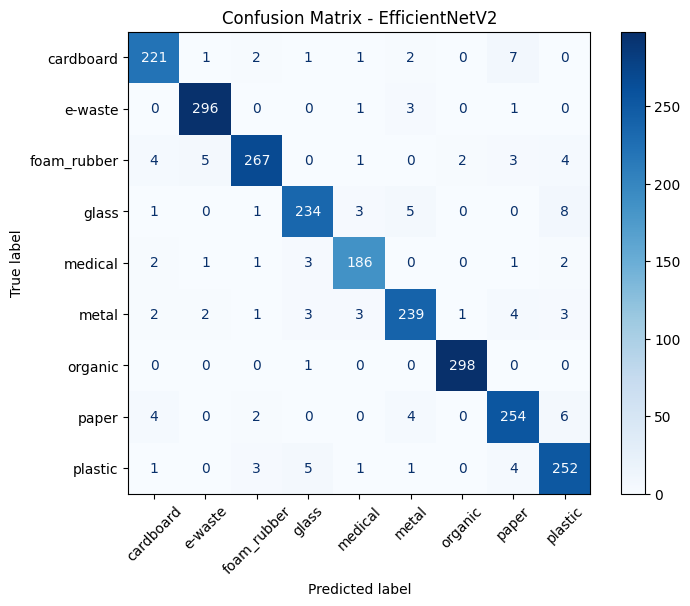

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🔹 Collect predictions & labels
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = outputs.max(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 🔹 Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)

# 🔹 Plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix - EfficientNetV2")
plt.show()


In [15]:
# 🔹 Switch to eval mode
model.eval()

# 🔹 Example input for tracing (match input size: 300x300 for EfficientNetV2)
example_input = torch.randn(1, 3, 300, 300).to(device)

# 🔹 Trace the model (strict=False allows more flexibility)
traced_model = torch.jit.trace(model, example_input, strict=False)

# 🔹 Save TorchScript
traced_model.save("efficientnetv2_trashnext_rpi.pt")

print("✅ TorchScript model saved as efficientnetv2_trashnext_rpi.pt")


✅ TorchScript model saved as efficientnetv2_trashnext_rpi.pt
